In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from statsmodels.graphics.gofplots import qqplot

In [4]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
data_copy = df.copy()
data_copy.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


# cleaning df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [13]:
df.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,PACIFICORP
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,PUGET SOUND ENERGY INC


In [7]:
df.shape

(150482, 17)

In [8]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df = df.drop(columns=['VIN (1-10)','Postal Code','Vehicle Location','DOL Vehicle ID','2020 Census Tract'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150137 entries, 0 to 150481
Data columns (total 12 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             150137 non-null  object 
 1   City                                               150137 non-null  object 
 2   State                                              150137 non-null  object 
 3   Model Year                                         150137 non-null  int64  
 4   Make                                               150137 non-null  object 
 5   Model                                              150137 non-null  object 
 6   Electric Vehicle Type                              150137 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  150137 non-null  object 
 8   Electric Range                                     150137 non-null  int64  
 9 

In [14]:
df = df[df['Electric Range'] > 0]

Text(0.5, 1.0, 'Electric Range Distribution')

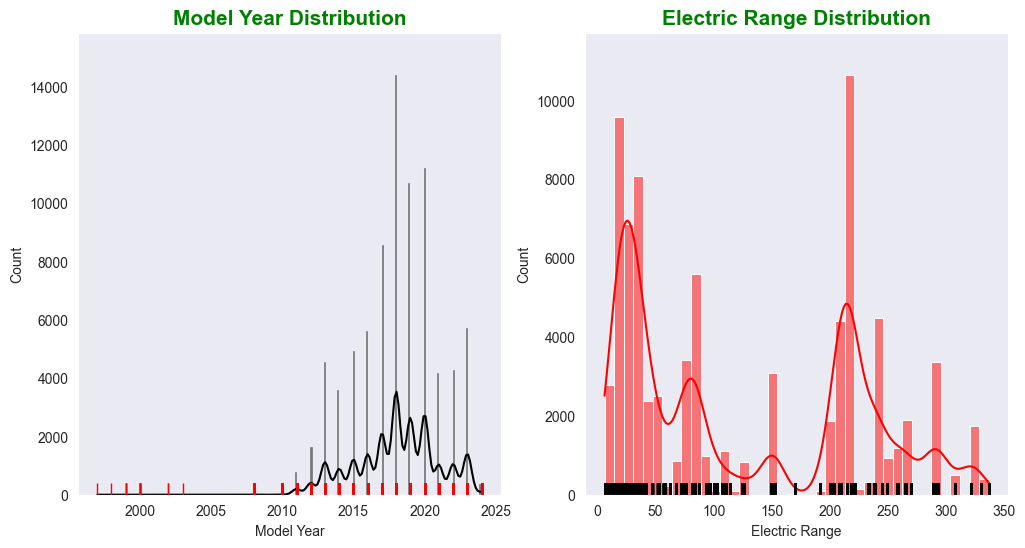

In [41]:
sns.set_style('dark')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.histplot(df, x='Model Year',kde=True, color='black',line_kws={'linewidth': 1.5} , ax=ax[0])
sns.rugplot(df, x='Model Year', ax=ax[0], color='r')
ax[0].set_title('Model Year Distribution', fontsize=15, fontweight='bold', color='green')

sns.histplot(df, x='Electric Range', kde=True, color='r',line_kws={'linewidth':1.5 } ,ax=ax[1])
sns.rugplot(df, x='Electric Range', ax=ax[1],color='black')
ax[1].set_title('Electric Range Distribution', fontsize=15, fontweight='bold', color='green')

In [42]:
columns_numeric = df.select_dtypes(include=['float','int']).columns.to_list()
columns_numeric

['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District']

In [48]:
for col in columns_numeric:
    print('_-_' * 20)
    print(f' \n   Columne_Name {col}')
    print(f'   Skew = {df[col].skew()}')
    print(f'   kurtosis = {df[col].kurt()}2\n')
    print('_-_' * 20)
    

_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
 
   Columne_Name Model Year
   Skew = -0.3134121498072685
   kurtosis = -0.081463459709318452

_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
 
   Columne_Name Electric Range
   Skew = 0.3716069357419159
   kurtosis = -1.38822891289815662

_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
 
   Columne_Name Base MSRP
   Skew = 8.718076497032579
   kurtosis = 285.122608277236342

_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
 
   Columne_Name Legislative District
   Skew = -0.4439668616279388
   kurtosis = -1.08634789728936922

_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_


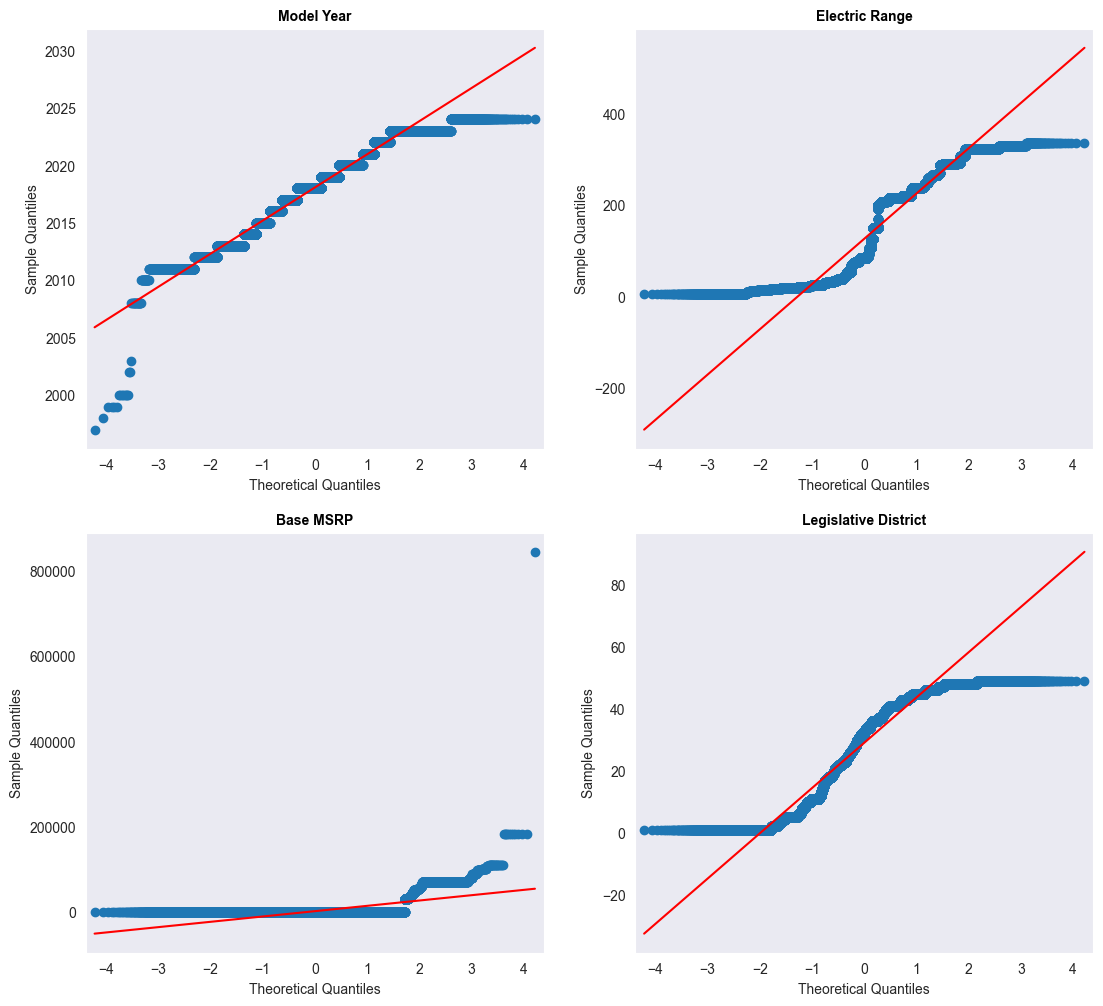

In [51]:
fig ,ax = plt.subplots(nrows=2, ncols=2 ,figsize=(13, 12))
ax = ax.flat
for i, col in enumerate(columns_numeric):
    qqplot(df[col], line='s', ax= ax[i])
    ax[i].set_title(col, fontsize = 10, fontweight = 'bold', color = 'black')

In [54]:
data_count = df['Electric Vehicle Type'].value_counts().reset_index()
data_count

,Electric Vehicle Type,count
0,Battery Electric Vehicle (BEV),47003
1,Plug-in Hybrid Electric Vehicle (PHEV),33554


[Text(0, 0, '33554')]

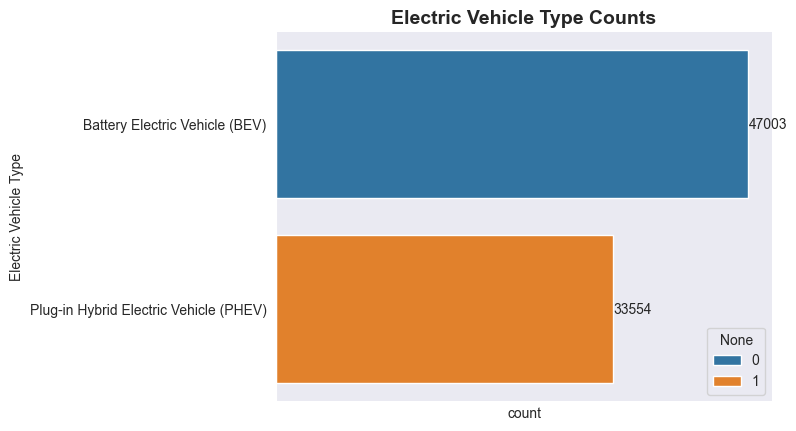

In [68]:
ax = sns.barplot(data_count,x='count' , y='Electric Vehicle Type', hue=data_count.index)
sns.despine(bottom=True)
plt.xticks([],[])
plt.title('Electric Vehicle Type Counts', fontsize=14, fontweight='bold')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

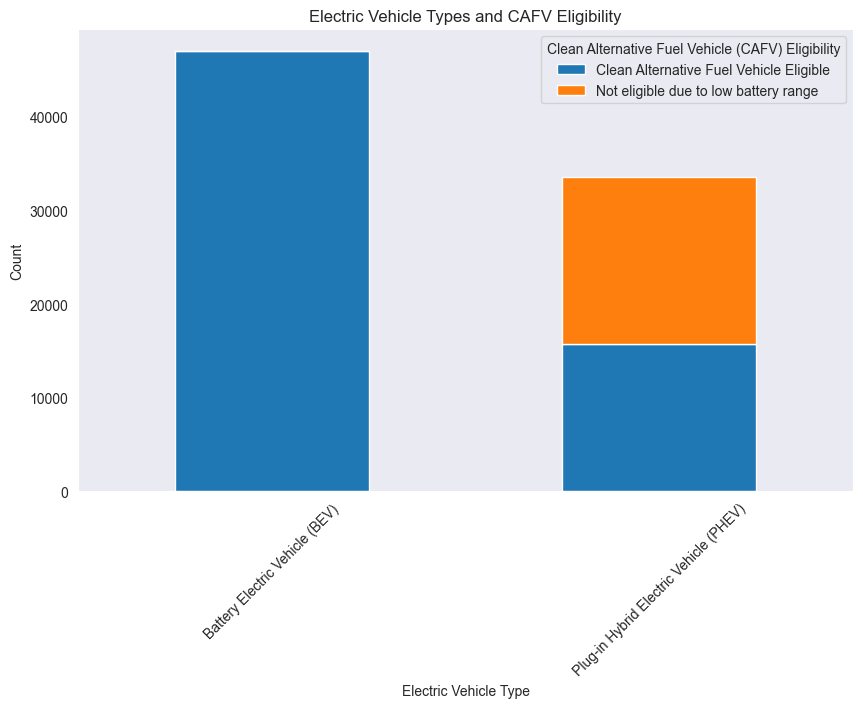

In [73]:
ev_type_cafv =df.groupby(['Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])['Electric Vehicle Type'].count().unstack()
ev_type_cafv.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Electric Vehicle Types and CAFV Eligibility')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45);

In [74]:
df.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,PACIFICORP
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,PUGET SOUND ENERGY INC


Text(0.5, 1.0, 'top 5 car model by WA state')

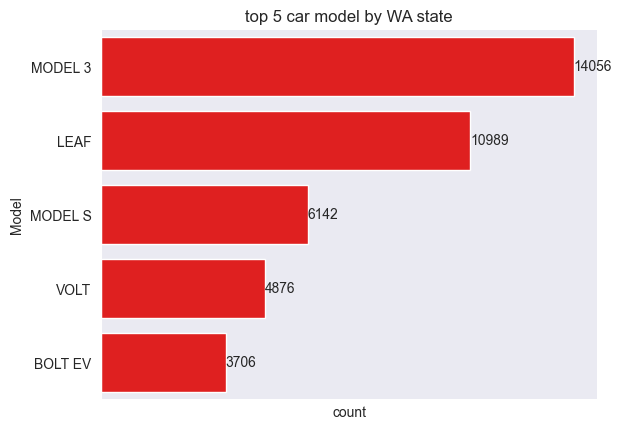

In [80]:
final_data = df[df['State'] == 'WA']['Model'].value_counts().reset_index().head(5)
final_data
ax = sns.barplot(final_data, x='count', y='Model' , color='r')
sns.despine(bottom=True)
plt.xticks([],[])
ax.bar_label(ax.containers[0]);
plt.title('top 5 car model by WA state')

In [82]:
df.columns

Index(['County', 'City', 'State', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'Electric Utility'],
      dtype='object')

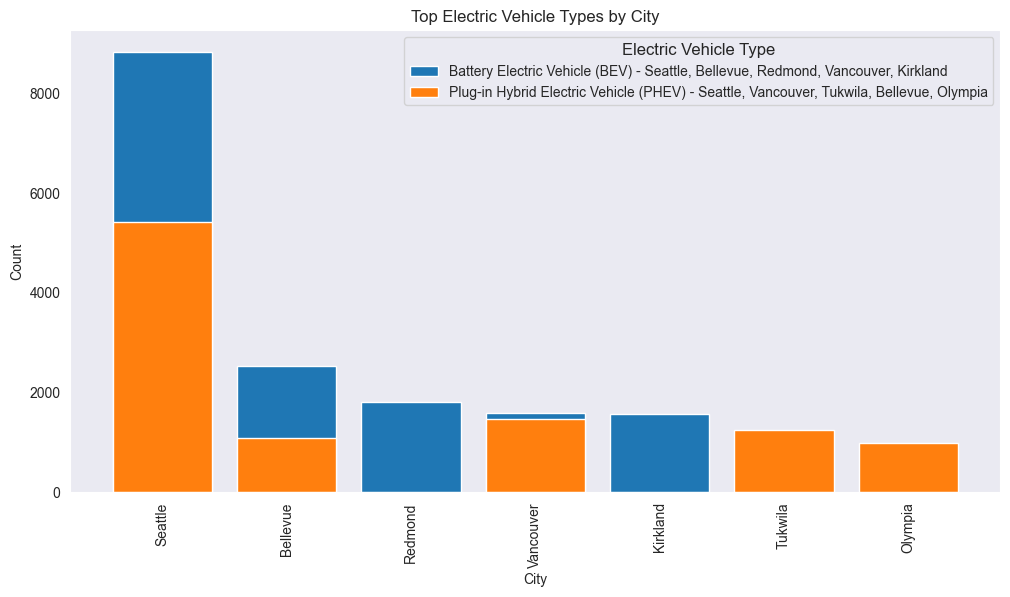

In [99]:
plt.figure(figsize=(12, 6))

top_cities_by_type = {}

for ev_type in df['Electric Vehicle Type'].unique():
    ev_type_data = df[df['Electric Vehicle Type'] == ev_type]
    city_counts = ev_type_data['City'].value_counts().head(5) 
    plt.bar(city_counts.index, city_counts.values, label=ev_type)
    
    top_cities_by_type[ev_type] = city_counts.index.tolist()

plt.title('Top Electric Vehicle Types by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)

top_legend_labels = [f"{ev_type} - {', '.join(top_cities_by_type[ev_type])}" for ev_type in df['Electric Vehicle Type'].unique()]
plt.legend(top_legend_labels, title='Electric Vehicle Type', title_fontsize=12)

plt.show()